## Linear Regression

Gradient Descent derivation is available [here](https://towardsdatascience.com/understanding-the-mathematics-behind-gradient-descent-dde5dc9be06e)

In [45]:
# Import libraries
import numpy as np
import pandas as pd

# Linear Regression 
class LinearRegressionFromScratch: 
      
    def __init__(self, n_iterations=int(1e6), learning_rate=1e-6):
        """Initialize variables"""
          
        # Model parameters
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate 

        # Data
        self.X = self.y = None

        # Training examples and features
        self.m = self.n = 0

        # Model parameters
        self.b = self.W = None
        self.J = list()

    def predict(self, X):
        """Method for predicting values using features and weights"""
      
        return X.dot(self.W) + self.b

    def calculate_cost(self, y, y_pred):
        """Calculate the value of the cost function"""

        return np.sum((y_pred - y) ** 2) / (2 * self.m)

    def update_weights(self, batch_size=None):
        """Helper function to update weights in gradient descent"""

        # Sample training examples
        if batch_size:
            Xy = np.column_stack([self.X, self.y])
            Xy = Xy[np.random.choice(Xy.shape[0], batch_size, replace=False), :]
            X = Xy[:, :-1]
            y = Xy[:, -1]

        else:
            X = self.X
            y = self.y
             
        # Predict
        y_pred = self.predict(X)

        # Calculate cost
        self.J.append(self.calculate_cost(y, y_pred))
          
        # Calculate gradients
        db = np.sum(y_pred - y) / self.m
        dW = (X.T).dot(y_pred - y) / self.m
          
        # Update weights
        self.b = self.b - (self.learning_rate * db)
        self.W = self.W - (self.learning_rate * dW)
          
    def fit(self, X, y, method='batch gradient descent'):
        """Method for fitting the model to the data""" 

        # Data
        self.X = X
        self.y = y

        # Training examples and features
        self.m, self.n = X.shape

        # Model weights
        self.b = 0
        self.W = np.zeros(self.n)
        
        # Gradient descent
        if method == 'batch gradient descent':
            for i in range(self.n_iterations):   
                self.update_weights()

        elif method == 'mini-batch gradient descent':
            for i in range(self.n_iterations):   
                self.update_weights(batch_size=100)

        elif method == 'stochastic gradient descent':
            for i in range(self.n_iterations):   
                self.update_weights(batch_size=1)

        # Normal equation
        elif method == 'normal equation':
            X_intercept = np.hstack((np.ones((self.m, 1)), X))
            weights = np.dot(np.linalg.inv(np.dot(X_intercept.T, X_intercept)), np.dot(X_intercept.T, y))
            self.b = weights[0]
            self.W = weights[1:]
              
        return self


## Import data

In [46]:
# Import libraries
from sklearn.datasets import load_boston

# Load Boston House Prices dataset
X, y = load_boston(return_X_y=True)

## Train models and evaluate on test data

In [47]:
# Import libraries
import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(  
    X, y, test_size=0.2, random_state=0)
    
# Train models
model_0 = LinearRegression()
start_time = time.time()
model_0.fit(X_train, y_train)
t0 = time.time() - start_time

model_1 = LinearRegressionFromScratch(n_iterations=int(1e6), learning_rate=1e-6)
start_time = time.time()
model_1.fit(X_train, y_train, method='batch gradient descent')
t1 = time.time() - start_time

model_2 = LinearRegressionFromScratch(n_iterations=int(1e6), learning_rate=1e-6)
start_time = time.time()
model_2.fit(X_train, y_train, method='mini-batch gradient descent')
t2 = time.time() - start_time

model_3 = LinearRegressionFromScratch(n_iterations=int(1e6), learning_rate=1e-6)
start_time = time.time()
model_3.fit(X_train, y_train, method='stochastic gradient descent')
t3 = time.time() - start_time

model_4 = LinearRegressionFromScratch()
start_time = time.time()
model_4.fit(X_train, y_train, method='normal equation')
t4 = time.time() - start_time

# Evaluate models
y_test_pred_0 = model_0.predict(X_test)
y_test_pred_0 = np.where(y_test_pred_0 < 0, 0, y_test_pred_0)
print('RMSLE (sklearn):', np.round(np.sqrt(mean_squared_log_error(y_test, y_test_pred_0)), 2))
print('Runtime:', round(t0, 2), 's')

y_test_pred_1 = model_1.predict(X_test)
y_test_pred_1 = np.where(y_test_pred_1 < 0, 0, y_test_pred_1)
print('\nRMSLE (from scratch - Batch Gradient Descent):', np.round(np.sqrt(mean_squared_log_error(y_test, y_test_pred_1)), 2))
print('Runtime:', round(t1, 2), 's')

y_test_pred_2 = model_2.predict(X_test)
y_test_pred_2 = np.where(y_test_pred_2 < 0, 0, y_test_pred_2)
print('\nRMSLE (from scratch - Mini-Batch Gradient Descent):', np.round(np.sqrt(mean_squared_log_error(y_test, y_test_pred_2)), 2))
print('Runtime:', round(t2, 2), 's')

y_test_pred_3 = model_3.predict(X_test)
y_test_pred_3 = np.where(y_test_pred_3 < 0, 0, y_test_pred_3)
print('\nRMSLE (from scratch - Stochastic Gradient Descent):', np.round(np.sqrt(mean_squared_log_error(y_test, y_test_pred_3)), 2))
print('Runtime:', round(t3, 2), 's')

y_test_pred_4 = model_4.predict(X_test)
y_test_pred_4 = np.where(y_test_pred_4 < 0, 0, y_test_pred_4)
print('\nRMSLE (from scratch - Normal Equation):', np.round(np.sqrt(mean_squared_log_error(y_test, y_test_pred_4)), 2))
print('Runtime:', round(t4, 2), 's')

RMSLE (sklearn): 0.32
Runtime: 0.0 s

RMSLE (from scratch - Batch Gradient Descent): 0.32
Runtime: 30.9 s

RMSLE (from scratch - Mini-Batch Gradient Descent): 0.32
Runtime: 90.43 s

RMSLE (from scratch - Stochastic Gradient Descent): 0.62
Runtime: 69.65 s

RMSLE (from scratch - Normal Equation): 0.32
Runtime: 0.0 s


## Gradient Descent of cost function

### Batch Gradient Descent

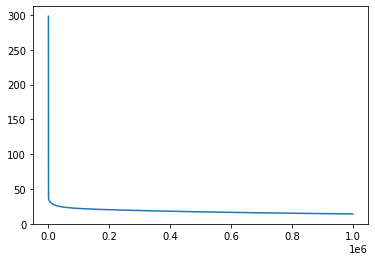

In [48]:
# Plot cost function
pd.Series(model_1.J).plot()

### Mini-Batch Gradient Descent

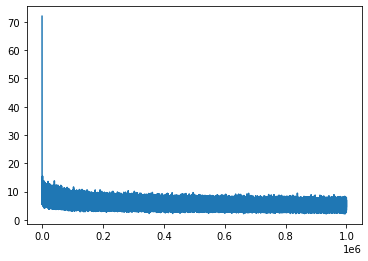

In [49]:
# Plot cost function
pd.Series(model_2.J).plot()

### Stochastic Gradient Descent

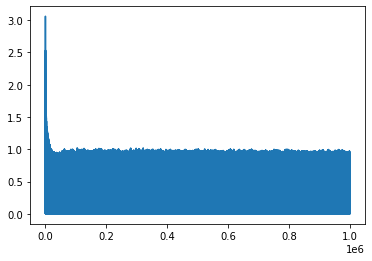

In [50]:
# Plot cost function
pd.Series(model_3.J).plot()